# Causal Inference
## Задание CI.2


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---


**Баллы за задание:**

* Задача 1 — 10 баллов
* Задача 2 — 20 баллов
* Задача 3 — 50 баллов
* Задача 4 — 50 баллов


In [1]:
# Bot check

# HW_ID: ds_ci2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import graphviz as gr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from causalinference import CausalModel
import sys
sys.setrecursionlimit(10000)
import warnings
warnings.filterwarnings("ignore")

---
### Задача 1.
Случайные величины $X$, $Y$ и $Z$ имеют следующее распределение.

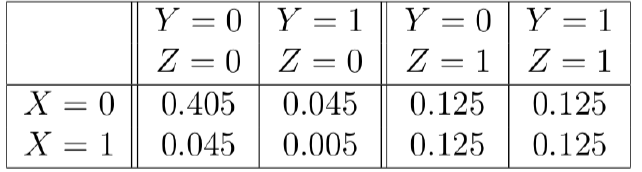

Являются ли величины $X$ и $Y$
* независимыми;
* условно независимыми по $Z$?

Можно использовать питон как калькулятор.

In [3]:
P = np.ones((2,2,2))  # X,Y,Z
P[0][0][0], P[0][1][0], P[0][0][1], P[0][1][1] = 0.405, 0.045, 0.125, 0.125
P[1][0][0], P[1][1][0], P[1][0][1], P[1][1][1] = 0.045, 0.005, 0.125, 0.125

*1) для независимости должно быть $P(X=x,Y=y) = P(X=x) \cdot P(Y=y), \forall x,y$*

In [4]:
PX, PY = P.sum(axis=(1,2)), P.sum(axis=(0,2))
for x in range(2):
    for y in range(2):
        print(f"P(X={x},Y={y}) = {P[x,y,:].sum():.2f}, P(X={x})*P(Y={y}) = {PX[x]*PY[y]:.2f}") 

P(X=0,Y=0) = 0.53, P(X=0)*P(Y=0) = 0.49
P(X=0,Y=1) = 0.17, P(X=0)*P(Y=1) = 0.21
P(X=1,Y=0) = 0.17, P(X=1)*P(Y=0) = 0.21
P(X=1,Y=1) = 0.13, P(X=1)*P(Y=1) = 0.09


*Видно, что то условие нарушается $(\exists x,y$ при которых $\cancel{=})$, то есть X,Y НЕ независимы*

*2) для усл. независимости по Z должно быть $P(X=x,Y=y|Z=z) = P(X=x|Z=z) \cdot P(Y=y|Z=z), \forall x,y,z$*

In [5]:
PX_if_Z, PY_if_Z = P.sum(axis=1)/P.sum(axis=(0,1)), P.sum(axis=0)/P.sum(axis=(0,1))
for x in range(2):
    for y in range(2):
        for z in range(2):
            print(f"P(X={x},Y={y}|Z={z}) = {P[x,y,z]/P.sum(axis=(0,1))[z]:.2f}, P(X={x}|Z={z})*P(Y={y}|Z={z}) = {PX_if_Z[x,z]*PY_if_Z[y,z]:.2f}")

P(X=0,Y=0|Z=0) = 0.81, P(X=0|Z=0)*P(Y=0|Z=0) = 0.81
P(X=0,Y=0|Z=1) = 0.25, P(X=0|Z=1)*P(Y=0|Z=1) = 0.25
P(X=0,Y=1|Z=0) = 0.09, P(X=0|Z=0)*P(Y=1|Z=0) = 0.09
P(X=0,Y=1|Z=1) = 0.25, P(X=0|Z=1)*P(Y=1|Z=1) = 0.25
P(X=1,Y=0|Z=0) = 0.09, P(X=1|Z=0)*P(Y=0|Z=0) = 0.09
P(X=1,Y=0|Z=1) = 0.25, P(X=1|Z=1)*P(Y=0|Z=1) = 0.25
P(X=1,Y=1|Z=0) = 0.01, P(X=1|Z=0)*P(Y=1|Z=0) = 0.01
P(X=1,Y=1|Z=1) = 0.25, P(X=1|Z=1)*P(Y=1|Z=1) = 0.25


*Видно, что тут уже условие выполнено, то есть X,Y усл. независ. по Z*  
*Итог: X,Y НЕ являются незаввисимыми, но при этом являются условно независимыми по Z*

---
### Задача 2.

На рисунке дан ориентированный граф.
* В предположении, что он задает марковское распределение, выпишите факторизацию плотности, см. определение марковского распределения.
* Перечислите все коллайдры.
* Докажите независимость $X$ и $Z_j$.

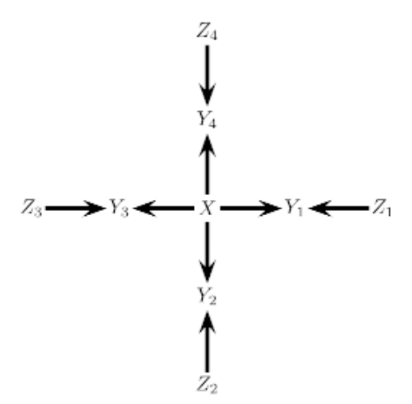

*1) факторизация пл-ти: $ p(X,Y_1,Y_2,Y_3,Y_4,Z_1,Z_2,Z_3,Z_4) = p(X)p(Z_1)p(Z_2)p(Z_3)p(Z_4)p(Y_1|X,Z_1)p(Y_2|X,Z_2)p(Y_3|X,Z_3)p(Y_4|X,Z_4)$*  
*2) коллайдеры: игреки $Y_j$ на путях $X Y_j Z_j, \forall j \in \overline{1,4}$*  
*3) нез-ть $X$ и $Z_j$: пусть $W = X$, $\overline{W} = \{Z_1,Z_2,Z_3,Z_4\}$. По теореме с лекции, $W$ и $\overline{W}$ условно независимы по родителям $X$, которых нет. Значит, $X$ и $Z_j$ просто независимы*  

---
### Задача 3.

Вернемся к данным задачи AB.3.1, где, как мы ранее выяснили, экспериментальная выборка выбиралась не рандомизировано. Загрузите данные.

In [6]:
df = pd.read_excel('hw_ab3_task1.xlsx')
df.head(3)

,Unnamed: 0,gender,OS,month1,month2,month3,month4,month5,month6,month7,...,month10,month11,month12,month13,month14,month15,month16,month17,month18,b_group
0,0,woman,Android,0.000000,0.000000,1260.801227,1245.777408,0.000000,0.000000,1381.093860,...,1110.443064,0.000000,0.000000,0.000000,0.000000,1362.797130,1555.238727,0.0,0.00000,no
1,1,man,Android,2142.521523,1821.295907,1832.895312,1646.448173,0.000000,2154.948644,1912.998501,...,0.000000,2253.871388,2526.126916,2861.138746,3068.924457,3384.232538,0.000000,0.0,0.00000,yes
2,2,man,iOS,2064.105816,0.000000,0.000000,1454.148004,1821.118092,1917.801237,2188.827425,...,1605.922754,0.000000,0.000000,1672.408077,1403.642040,1094.256738,962.442222,0.0,1483.00722,no


Посчитайте выборочные средние за последний месяц, а также примените обычный t-test для сравнения этих средних.

In [7]:
groups = {'Контроль':df[df.b_group=='no'].month18, 'Тритмент':df[df.b_group=='yes'].month18}
print(*[f'{k}: {v.mean():.2f}' for k,v in groups.items()], sep=', ')
print('Есть стат. значимое различие' if sps.ttest_ind(*groups.values()).pvalue < 0.05 else 'Нет стат. значимого различия' )

Контроль: 965.45, Тритмент: 1079.01
Есть стат. значимое различие


Но мы же знаем, что группы несопоставимы. Это означает, что нужно применять методы causal inference. Постройте и визуализируйте граф причинно-следственных связей по представленным в данных признакам. Чтобы не раздувать граф, среди месяцев достаточно рассмотреть только 3 последних.

*Примечание.* Граф может не сохраниться в ноутбуке. Сделайте скриншот и прикрепите картинку к ноутбуку.

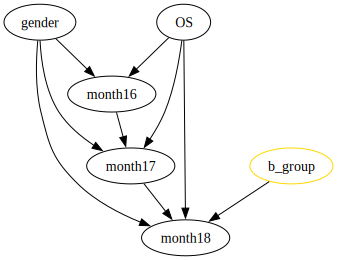

In [8]:
g = gr.Digraph()
g.edge('month16', 'month17')  # кажется, логично предположть марковость, что месяц влияет только на следующий (прямого потомка)?
g.edge('month17', 'month18')
for f in ['gender','OS']:
    for m in ['month16','month17','month18']:
        g.edge(f,m)  # на каждый месяц влияют признаки gender\OS
g.edge('b_group', 'month18')  # признак группы контроль\тритмент
g.node('b_group', color='gold')
g

Постройте оценки propensity score с помощью логистической регрессии. Визуализируйте гистограмму полученных оценок для двух выборок. Можно ли по ней говорить о смещенности групп?

*Указание.* Не стоит брать больше 3-5 месяцев в качестве признаков.

In [9]:
df = df[['gender','OS','month16','month17','month18','b_group']]
df['b_group'], df['gender'], df['OS'] = df['b_group'].apply(lambda x:x=='yes'), df['gender'].apply(lambda x:x=='man'), df['OS'].apply(lambda x:x=='iOS')
X, T = df[['gender','OS','month16','month17']], df['b_group']
df['propensity_score'] = LogisticRegression().fit(X,T).predict_proba(X)[:,1]
display(df[['b_group','month18','propensity_score']].round(3).head(3))

,b_group,month18,propensity_score
0,False,0.000,0.072
1,True,0.000,0.078
2,False,1483.007,0.068


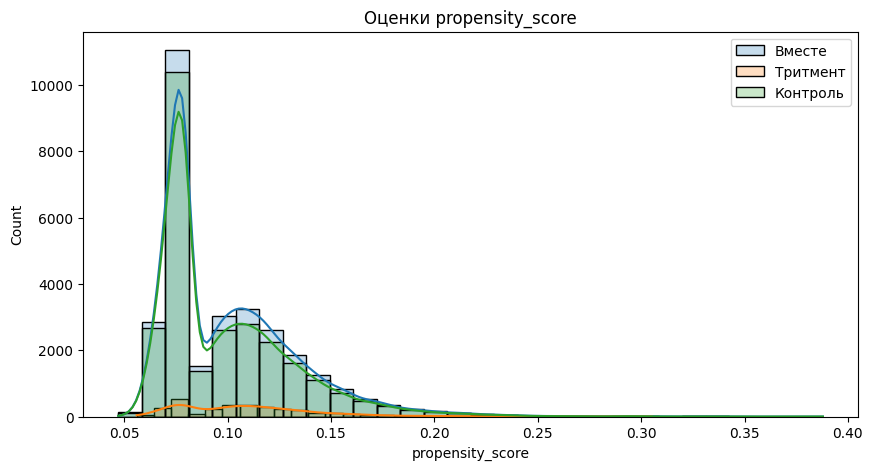

In [10]:
plt.figure(figsize=(10,5))
plt.title('Оценки propensity_score')
sns.histplot(df.propensity_score, bins=30, alpha=0.25, label='Вместе', kde=True)
sns.histplot(df[(df.b_group==1)].propensity_score, bins=30, alpha=0.25, label='Тритмент', kde=True)
sns.histplot(df[(df.b_group==0)].propensity_score, bins=30, alpha=0.25, label='Контроль', kde=True)
plt.legend()
plt.show()

*Смещения не наблюдается*

Посчитайте "раздутый" размер каждой из групп на основе весов, определяемых с помощью propensity score.

In [11]:
W_C, W_T = 1/(1-df[df.b_group==0].propensity_score), 1/df[df.b_group==1].propensity_score
print(f'Раздутый размер контроля:  {W_C.sum():.0f}\nРаздутый размер тритмента: {W_T.sum():.0f}')

Раздутый размер контроля:  30006
Раздутый размер тритмента: 29680


Наконец, посчитайте оценку ATE с помощью этих весов. Постройте также доверительный интервал, используя бутстреп.

In [12]:
print(f'ATE: {np.mean(df.month18 * (df.b_group-df.propensity_score) / (df.propensity_score*(1-df.propensity_score))):.2f}')

ATEs = []
for _ in range(500):
    sample = df.sample(frac=1, replace=True)
    X_boot, T_boot, Y_boot = sample[['gender','OS','month16','month17']], sample['b_group'], sample['month18']
    ps = LogisticRegression(max_iter=200).fit(X_boot, T_boot).predict_proba(X_boot)[:,1]
    ATEs.append(np.mean(Y_boot * (T_boot-ps) / (ps*(1-ps))))
print(f'95% дов. инт.: {np.percentile(ATEs, [2.5,97.5]).round(2)}')

ATE: -42.95
95% дов. инт.: [-82.59  -3.85]


Повторите все эти действия для какой-либо другой ML-модели, которая умеет предсказывать вероятности класса, например, можно взять градиентный бустинг. Сравните результаты.

,b_group,month18,propensity_score
0,False,0.000,0.062
1,True,0.000,0.061
2,False,1483.007,0.059


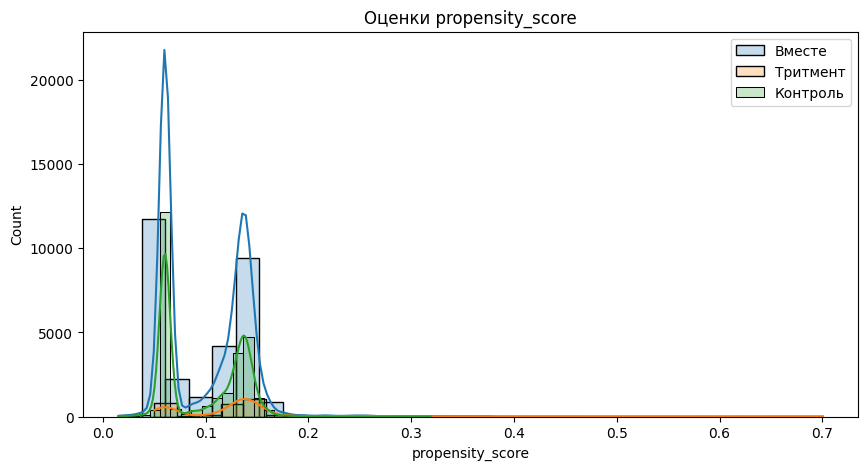

Раздутый размер контроля:  29955
Раздутый размер тритмента: 28586
ATE: -57.34
95% дов. инт.: [-118.32  -47.98]


In [13]:
df = pd.read_excel('hw_ab3_task1.xlsx', usecols=['gender','OS','month16','month17','month18','b_group'])
df['b_group'], df['gender'], df['OS'] = df['b_group'].apply(lambda x:x=='yes'), df['gender'].apply(lambda x:x=='man'), df['OS'].apply(lambda x:x=='iOS')
X, T = df[['gender','OS','month16','month17']], df['b_group']
df['propensity_score'] = GradientBoostingClassifier().fit(X,T).predict_proba(X)[:,1]
display(df[['b_group','month18','propensity_score']].round(3).head(3))

plt.figure(figsize=(10,5))
plt.title('Оценки propensity_score')
sns.histplot(df.propensity_score, bins=30, alpha=0.25, label='Вместе', kde=True)
sns.histplot(df[(df.b_group==1)].propensity_score, bins=30, alpha=0.25, label='Тритмент', kde=True)
sns.histplot(df[(df.b_group==0)].propensity_score, bins=30, alpha=0.25, label='Контроль', kde=True)
plt.legend()
plt.show()

W_C, W_T = 1/(1-df[df.b_group==0].propensity_score), 1/df[df.b_group==1].propensity_score
print(f'Раздутый размер контроля:  {W_C.sum():.0f}\nРаздутый размер тритмента: {W_T.sum():.0f}')

print(f'ATE: {np.mean(df.month18 * (df.b_group-df.propensity_score) / (df.propensity_score*(1-df.propensity_score))):.2f}')

ATEs = []
for _ in range(200):
    sample = df.sample(frac=1, replace=True)
    X_boot, T_boot, Y_boot = sample[['gender','OS','month16','month17']], sample['b_group'], sample['month18']
    propensity_score = GradientBoostingClassifier().fit(X_boot, T_boot).predict_proba(X_boot)[:,1]
    ATEs.append(np.mean(Y_boot * (T_boot-propensity_score) / (propensity_score*(1-propensity_score))))
print(f'95% дов. инт.: {np.percentile(ATEs, [2.5,97.5]).round(2)}')

Наконец, оцените ATE с помощью библиотеки causalinference методами propensity score matching и propensity score weighting. Сравните резульаты.

*Примечание.* Может случится `RecursionError`. В таком случае нужно увеличить лимит рекурсии:
```
import sys
sys.setrecursionlimit(10000)
```

In [14]:
df[['gender','OS']] = df[['gender','OS']].astype(int)
cm = CausalModel(Y=df.month18.values, D=df.b_group.values, X=df[['gender','OS','month16','month17']].values)
cm.est_via_matching(matches=1, bias_adj=True)
cm.estimates

{'matching': {'atc': 3.1503489347559603, 'att': 11.116303330088233, 'ate': 3.9469443742891874, 'atc_se': 32.252508349701905, 'att_se': 34.5971439747167, 'ate_se': 31.251395261368707}}

*В этом подходе ATE отличается*

---
### Задача 4.

Загрузите <a href="https://github.com/robjellis/lalonde">данные</a> об исследовании влияния эффективности программы профессиональной переподготовки по отношению к реальному заработку человека через пару лет после завершения программы (в 1978). Данные также содержат несколько демографических показателей &mdash; возраст, раса, академическое образование и предыдущий заработок.

Повторите для этих данных исследование предыдущей задачи.

In [21]:
df = pd.read_csv('lalonde_data.csv')
df.head(3)

,ID,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.046
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.894
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.450


In [22]:
groups = {'Контроль':df[df.treat==0].re78, 'Тритмент':df[df.treat==1].re78}
print(*[f'{k}: {v.mean():.2f}' for k,v in groups.items()], sep=', ')
print('Есть стат. значимое различие' if sps.ttest_ind(*groups.values()).pvalue < 0.05 else 'Нет стат. значимого различия' )

Контроль: 6984.17, Тритмент: 6349.14
Нет стат. значимого различия


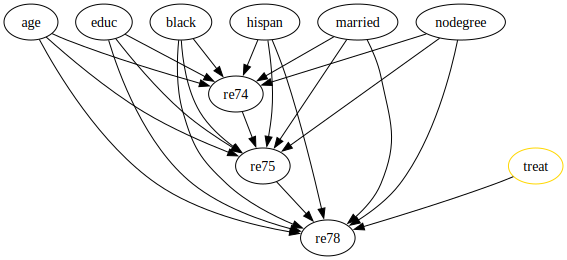

In [23]:
g = gr.Digraph()
g.edge('re74', 're75')  # кажется, снова логично предположть марковость, что месяц влияет только на следующий (прямого потомка)?
g.edge('re75', 're78')
for f in ['age','educ','black','hispan','married','nodegree']:
    for re in ['re74','re75','re78']:
        g.edge(f,re)
g.edge('treat', 're78')  # признак группы контроль\тритмент
g.node('treat', color='gold')
g

,treat,re78,propensity_score
0,1,9930.046,0.495
1,1,3595.894,0.254
2,1,24909.450,0.698


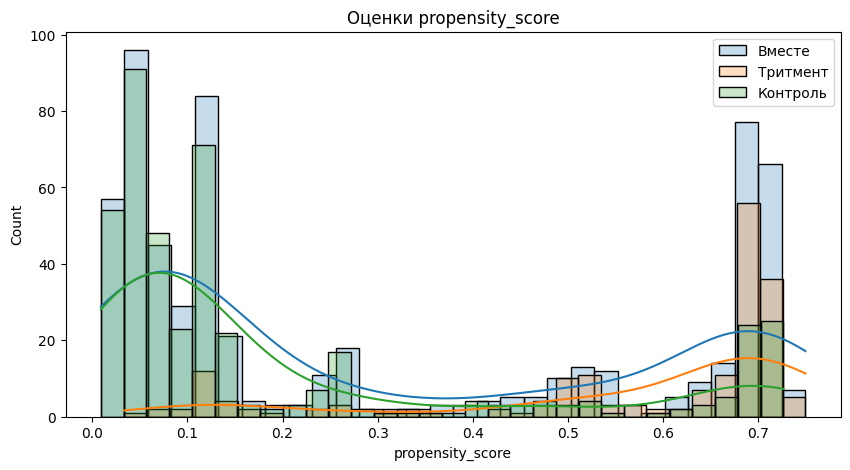

Раздутый размер контроля:  622
Раздутый размер тритмента: 501
ATE: -890.47
95% дов. инт.: [-2326.08  1000.05]


In [24]:
X, T = df.drop(columns=['ID','treat','re78']), df['treat']
df['propensity_score'] = LogisticRegression(max_iter=200).fit(X,T).predict_proba(X)[:,1]
display(df[['treat','re78','propensity_score']].round(3).head(3))

plt.figure(figsize=(10,5))
plt.title('Оценки propensity_score')
sns.histplot(df.propensity_score, bins=30, alpha=0.25, label='Вместе', kde=True)
sns.histplot(df[(df.treat==1)].propensity_score, bins=30, alpha=0.25, label='Тритмент', kde=True)
sns.histplot(df[(df.treat==0)].propensity_score, bins=30, alpha=0.25, label='Контроль', kde=True)
plt.legend()
plt.show()

W_C, W_T = 1/(1-df[df.treat==0].propensity_score), 1/df[df.treat==1].propensity_score
print(f'Раздутый размер контроля:  {W_C.sum():.0f}\nРаздутый размер тритмента: {W_T.sum():.0f}')

print(f'ATE: {np.mean(df.re78 * (df.treat-df.propensity_score) / (df.propensity_score*(1-df.propensity_score))):.2f}')

ATEs = []
for _ in range(1000):
    sample = df.sample(frac=1, replace=True)
    X_boot, T_boot, Y_boot = sample.drop(columns=['ID','treat','re78']), sample['treat'], sample['re78']
    propensity_score = LogisticRegression(max_iter=200).fit(X_boot, T_boot).predict_proba(X_boot)[:,1]
    ATEs.append(np.mean(Y_boot * (T_boot-propensity_score) / (propensity_score*(1-propensity_score))))
print(f'95% дов. инт.: {np.percentile(ATEs, [2.5,97.5]).round(2)}')

,treat,re78,propensity_score
0,1,9930.046,0.572
1,1,3595.894,0.787
2,1,24909.450,0.921


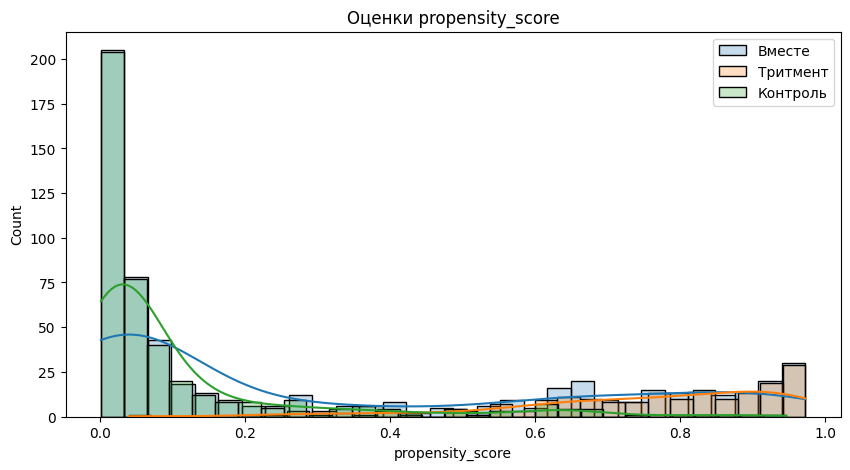

Раздутый размер контроля:  541
Раздутый размер тритмента: 290
ATE: -3178.21
95% дов. инт.: [-3841.35 -2281.96]


In [25]:
df = pd.read_csv('lalonde_data.csv')
X, T = df.drop(columns=['ID','treat','re78']), df['treat']
df['propensity_score'] = GradientBoostingClassifier().fit(X,T).predict_proba(X)[:,1]
display(df[['treat','re78','propensity_score']].round(3).head(3))

plt.figure(figsize=(10,5))
plt.title('Оценки propensity_score')
sns.histplot(df.propensity_score, bins=30, alpha=0.25, label='Вместе', kde=True)
sns.histplot(df[(df.treat==1)].propensity_score, bins=30, alpha=0.25, label='Тритмент', kde=True)
sns.histplot(df[(df.treat==0)].propensity_score, bins=30, alpha=0.25, label='Контроль', kde=True)
plt.legend()
plt.show()

W_C, W_T = 1/(1-df[df.treat==0].propensity_score), 1/df[df.treat==1].propensity_score
print(f'Раздутый размер контроля:  {W_C.sum():.0f}\nРаздутый размер тритмента: {W_T.sum():.0f}')

print(f'ATE: {np.mean(df.re78 * (df.treat-df.propensity_score) / (df.propensity_score*(1-df.propensity_score))):.2f}')

ATEs = []
for _ in range(1000):
    sample = df.sample(frac=1, replace=True)
    X_boot, T_boot, Y_boot = sample.drop(columns=['ID','treat','re78']), sample['treat'], sample['re78']
    propensity_score = GradientBoostingClassifier().fit(X_boot, T_boot).predict_proba(X_boot)[:,1]
    ATEs.append(np.mean(Y_boot * (T_boot-propensity_score) / (propensity_score*(1-propensity_score))))
print(f'95% дов. инт.: {np.percentile(ATEs, [2.5,97.5]).round(2)}')

In [20]:
cm = CausalModel(Y=df.re78.values, D=df.treat.values, X=df.drop(columns=['ID','treat','re78']).values)
cm.est_via_matching(matches=1, bias_adj=True)
cm.estimates

{'matching': {'atc': -1166.4576306700885, 'att': 180.505087076745, 'ate': -760.6138150623292, 'atc_se': 2554.466085067078, 'att_se': 2200.7963006860746, 'ate_se': 1975.179828836924}}

*После переподготовки ЗП падает? странно*